In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from cmdstanpy import CmdStanModel
from baynes.plotter import FitPlotter
from baynes.model_utils import get_model, get_compiler_kwargs
from baynes.probability import hdi
import pandas as pd
from scipy import stats
import arviz as az
sns.set_style('ticks')
#sns.set_palette('colorblind')
sns.set_context("notebook", font_scale=1.6)
plt.rc("axes.spines", top=False, right=False)

import matplotlib as mpl
from matplotlib import cycler
colors = ["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"][4:6]#['#1b9e77','#e7298a','#d95f02','#7570b3','#66a61e','#e6ab02','#a6761d','#666666']
mpl.rcParams['axes.prop_cycle'] = cycler('color',colors)
cm = mpl.colors.ListedColormap(colors)

In [46]:
def meo(hex):
    h = hex.lstrip('#')
    print('RGB =', tuple(int(h[i:i+2], 16)/256 for i in (0, 2, 4)))

In [48]:
meo("#ffa300")

RGB = (0.99609375, 0.63671875, 0.0)


In [2]:
cm = mpl.colors.LinearSegmentedColormap.from_list('', np.array(colors), 256)

In [3]:
def cov_exp_quad(x1, x2, alpha, rho):
    x1 = np.asarray(x1)
    x2 = np.asarray(x1)
    k = []
    for x in x1:
        k.append((x-x2)**2)
    return alpha**2 * np.exp(-np.array(k)/(2*rho**2))

def cov_periodic(x1, x2, alpha, rho, p):
    x1 = np.asarray(x1)
    x2 = np.asarray(x1)
    k = []
    for x in x1:
        k.append(np.abs(x-x2))
    return alpha**2 * np.exp(-2*np.sin(np.pi*np.array(k)/p)**2/(rho**2))


fplot = FitPlotter(fig_ratio=1, output_dir="/home/pietro/work/TESI/thesis/figures/ch2/GP/", output_format='.pdf')

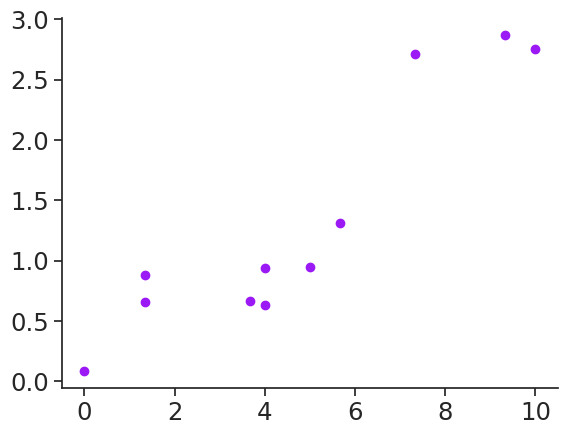

In [18]:
N2=31
x = np.linspace(0,10, N2)
N1=11
x1 = np.sort(np.random.choice(x, N1))
y1 = 0.3*x1 + np.random.normal(0,0.1,N1)+ 0.5* np.sin(x1)
plt.scatter(x1, y1)

In [23]:
data={'N1':N1, 'N2':N2, 'x1':x1, 'x2':x, 'y1':y1}
#data={'N':N1, 'x':x1, 'y':y1, 'prior':0}

fit = get_model('GP_quad.stan').sample(data,
                   chains=8,
                   iter_warmup=500,
                   iter_sampling=500,
                   save_warmup=True,
                   show_progress=True,
                   adapt_delta=0.9,
                   inits=1)
print(fit.diagnose())


11:07:21 - cmdstanpy - INFO - CmdStan start processing


Found .stan file  /home/pietro/work/TESI/baynes/stan/models/gaussian_processes/GP_quad.stan


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 5 |          | 00:00 Status

chain 6 |          | 00:00 Status

chain 7 |          | 00:00 Status

chain 8 |          | 00:00 Status

11:07:21 - cmdstanpy - INFO - CmdStan done processing.
11:07:21 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: cholesky_decompose: A is not symmetric. A[1,2] = inf, but A[2,1] = inf (in '/home/pietro/work/TESI/baynes/stan/models/gaussian_processes/GP_quad.stan', line 31, column 4 to column 32)
	Exception: cholesky_decompose: Matrix m is not positive definite (in '/home/pietro/work/TESI/baynes/stan/models/gaussian_processes/GP_quad.stan', line 31, column 4 to column 32)
	Exception: cholesky_decompose: Matrix m is not positive definite (in '/home/pietro/work/TESI/baynes/stan/models/gaussian_processes/GP_quad.stan', line 31, column 4 to column 32)
	Exception: cholesky_decompose: Matrix m is not positive definite (in '/home/pietro/work/TESI/baynes/stan/models/gaussian_processes/GP_quad.stan', line 31, column 4 to column 32)
	Exception: cholesky_decompose: Matrix m is not positive definite (in '/home/pietro/work/TESI/baynes/stan/models/gaussian_processes/GP_quad.stan', 


Processing csv files: /tmp/tmpaz5_dsdd/GP_quadep9vy2wr/GP_quad-20231015110721_1.csvWarning: non-fatal error reading adaptation data
, /tmp/tmpaz5_dsdd/GP_quadep9vy2wr/GP_quad-20231015110721_2.csvWarning: non-fatal error reading adaptation data
, /tmp/tmpaz5_dsdd/GP_quadep9vy2wr/GP_quad-20231015110721_3.csvWarning: non-fatal error reading adaptation data
, /tmp/tmpaz5_dsdd/GP_quadep9vy2wr/GP_quad-20231015110721_4.csvWarning: non-fatal error reading adaptation data
, /tmp/tmpaz5_dsdd/GP_quadep9vy2wr/GP_quad-20231015110721_5.csvWarning: non-fatal error reading adaptation data
, /tmp/tmpaz5_dsdd/GP_quadep9vy2wr/GP_quad-20231015110721_6.csvWarning: non-fatal error reading adaptation data
, /tmp/tmpaz5_dsdd/GP_quadep9vy2wr/GP_quad-20231015110721_7.csvWarning: non-fatal error reading adaptation data
, /tmp/tmpaz5_dsdd/GP_quadep9vy2wr/GP_quad-20231015110721_8.csvWarning: non-fatal error reading adaptation data


Checking sampler transitions treedepth.
Treedepth satisfactory for all transition

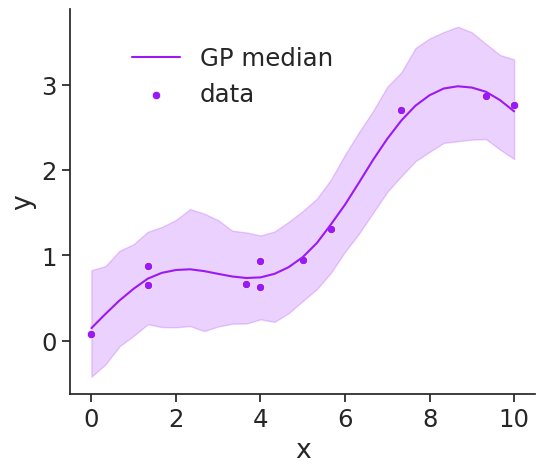

In [38]:
fplot = FitPlotter(fig_ratio=1, output_dir="/home/pietro/work/TESI/thesis/figures/ch2/GP/", output_format='.pdf')
fplot.add_fit(fit)
df = fit.draws_pd(['y2']).transpose()
df['x']=x
df = df.melt(id_vars='x')
ax = sns.lineplot(df, x='x', y='value', errorbar=hdi, label='GP median')
ax.set_ylabel('y')
sns.scatterplot(x=x1, y=y1, ax=ax, label='data')
f = fplot.new_figure('GP', ax.figure)
fplot.update_legend(edgecolor='white', bbox_to_anchor=(0.6,0.85))
fplot.resize(6,5)

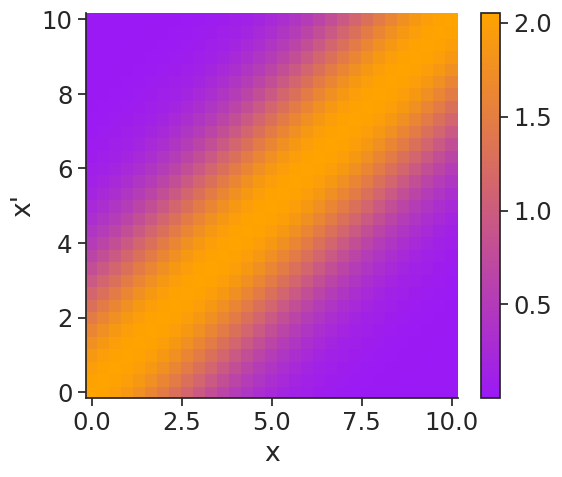

In [51]:
means = fit.draws_pd(['alpha', 'rho']).mean(axis=0)
z=cov_exp_quad(x, x, means['alpha'], means['rho'])
f = fplot.new_figure('kernel')
ax = f.subplots()
c = plt.pcolor(x,x,z, cmap=cm)
c.set_edgecolor('face')
f.colorbar(c)
ax.set_xlabel('x')
ax.set_ylabel(r"x'")
fplot.resize(6,5)


In [40]:
fplot.save_figures('all')

In [165]:
stan_file = get_stan_file('GP_periodic.stan')
modelper = CmdStanModel(stan_file=stan_file, **get_compiler_kwargs())

Found .stan file  /home/pietro/work/TESI/baynes/stan/models/gaussian_processes/GP_periodic.stan


11:02:01 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

11:02:01 - cmdstanpy - INFO - CmdStan done processing.
11:02:01 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gp_periodic_cov: period is 0, but must be positive! (in '/home/pietro/work/TESI/baynes/stan/models/gaussian_processes/GP_periodic.stan', line 24, column 4 to column 58)
Consider re-running with show_console=True if the above output is unclear!
11:02:01 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 41 divergent transitions (8.2%)
	Chain 2 had 29 divergent transitions (5.8%)
	Chain 3 had 23 divergent transitions (4.6%)
	Chain 4 had 25 divergent transitions (5.0%)
	Use function "diagnose()" to see further information.



Processing csv files: /tmp/tmpqa0hrn_w/GP_periodiclpnp6pec/GP_periodic-20231015110201_1.csvWarning: non-fatal error reading adaptation data
, /tmp/tmpqa0hrn_w/GP_periodiclpnp6pec/GP_periodic-20231015110201_2.csvWarning: non-fatal error reading adaptation data
, /tmp/tmpqa0hrn_w/GP_periodiclpnp6pec/GP_periodic-20231015110201_3.csvWarning: non-fatal error reading adaptation data
, /tmp/tmpqa0hrn_w/GP_periodiclpnp6pec/GP_periodic-20231015110201_4.csvWarning: non-fatal error reading adaptation data


Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
118 of 4000 (2.95%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective 

<Axes: xlabel='x', ylabel='value'>

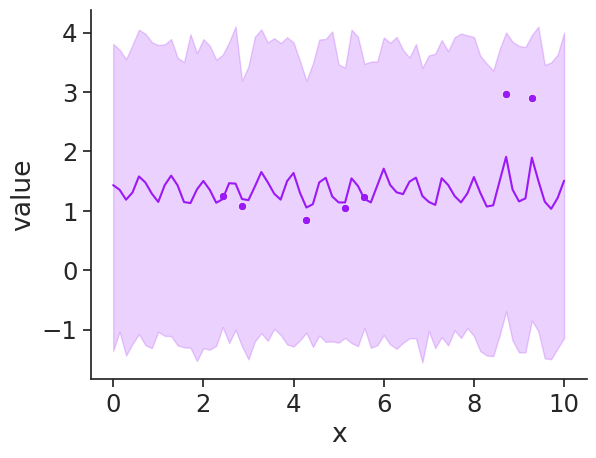

In [166]:
data={'N1':N1, 'N2':N2, 'x1':x1, 'x2':x, 'y1':y1}
#data={'N':N1, 'x':x1, 'y':y1, 'prior':0}

fit = modelper.sample(data,
                   chains=4,
                   iter_warmup=500,
                   iter_sampling=500,
                   save_warmup=True,
                   show_progress=True)
print(fit.diagnose())
fplot.add_fit(fit)
df = fit.draws_pd(['y2']).transpose()
df['x']=x
df = df.melt(id_vars='x')
ax = sns.lineplot(df, x='x', y='value', errorbar=hdi)
sns.scatterplot(x=x1, y=y1, ax=ax)

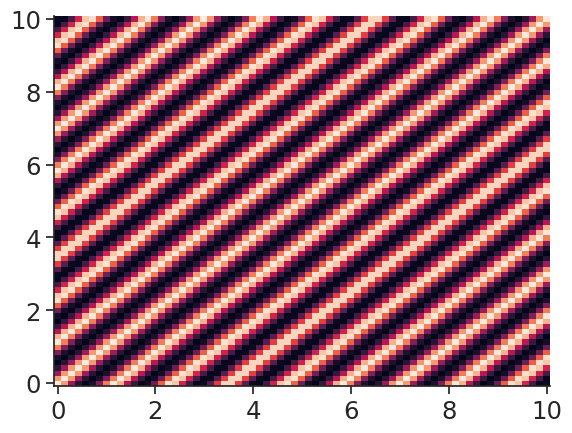

In [167]:
z=cov_periodic(x, x, np.mean(fit.draws_pd(['alpha']).to_numpy()), 
np.mean(fit.draws_pd(['rho']).to_numpy()),
np.mean(fit.draws_pd(['p']).to_numpy()))
plt.pcolor(x,x,z)

In [168]:
def cov_exp_quad(x1, x2, alpha, rho):
    x1 = np.asarray(x1)
    x2 = np.asarray(x1)
    k = []
    for x in x1:
        k.append((x-x2)**2)
    return alpha**2 * np.exp(-np.array(k)/(2*rho**2))

def cov_periodic(x1, x2, alpha, rho, p):
    x1 = np.asarray(x1)
    x2 = np.asarray(x1)
    k = []
    for x in x1:
        k.append(np.abs(x-x2))
    return alpha**2 * np.exp(-2*np.sin(np.pi*np.array(k)/p)**2/(rho**2))

In [169]:
x=np.linspace(0,10,201)
z=cov_exp_quad(x, x, 1, 1)
zp = cov_periodic(x,x,1,1,3)

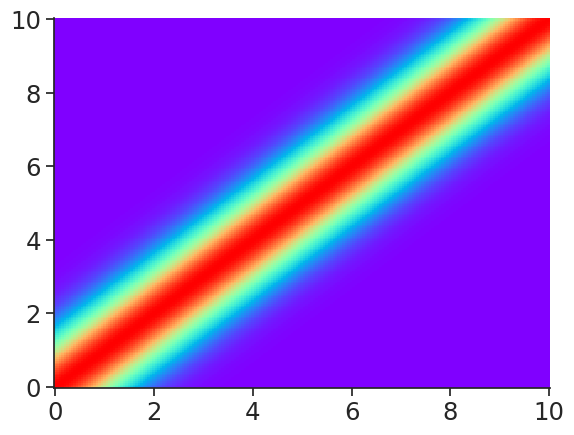

In [170]:
plt.set_cmap('rainbow')
plt.pcolor(x,x,z)

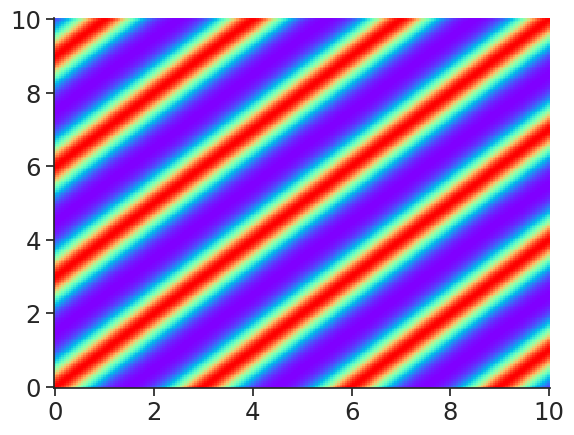

In [171]:
plt.pcolor(x,x,zp)